In [1]:
#Classification using Deep neural network (Any One from the following)
#Binary classification using Deep Neural Networks Example: Classify movie reviews into
#positive" reviews and "negative" reviews, just based on the text content of the reviews.
#Use IMDB dataset

In [2]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
     

2023-02-26 20:32:32.001253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 20:32:32.115850: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-26 20:32:32.115867: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-26 20:32:32.583176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

17464789/17464789 [==============================] - 50s 3us/step


In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [7]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
X_train.shape

(25000, 10000)

In [10]:
#Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')
     

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-02-26 20:35:15.308972: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-26 20:35:15.308990: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-26 20:35:15.309002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-ROG-Strix-G513RC-G513RC): /proc/driver/nvidia/version does not exist
2023-02-26 20:35:15.309183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])


/home/ubuntu/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20


2023-02-26 20:35:50.809937: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 1s 20ms/step - loss: 0.5437 - binary_accuracy: 0.7795 - val_loss: 0.4262 - val_binary_accuracy: 0.8706
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.4022 - binary_accuracy: 0.8848

2023-02-26 20:35:51.631357: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 0s 7ms/step - loss: 0.3465 - binary_accuracy: 0.9003 - val_loss: 0.3387 - val_binary_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2538 - binary_accuracy: 0.9234 - val_loss: 0.2947 - val_binary_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1967 - binary_accuracy: 0.9389 - val_loss: 0.2775 - val_binary_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1610 - binary_accuracy: 0.9511 - val_loss: 0.2747 - val_binary_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1323 - binary_accuracy: 0.9589 - val_loss: 0.3018 - val_binary_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1116 - binary_accuracy: 0.9675 - val_loss: 0.3149 - val_binary_accuracy: 0.8798
Epoch 8/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0953 - binary

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

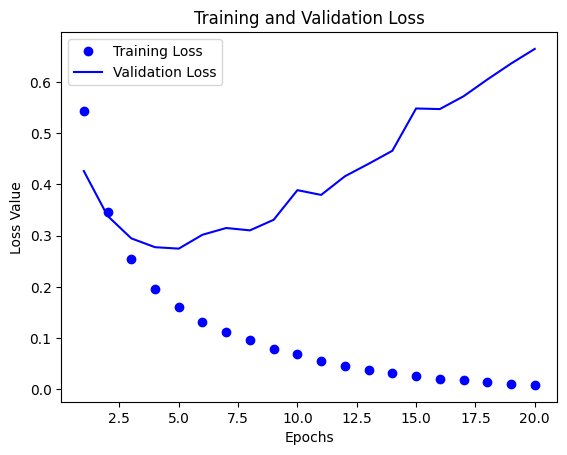

In [18]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

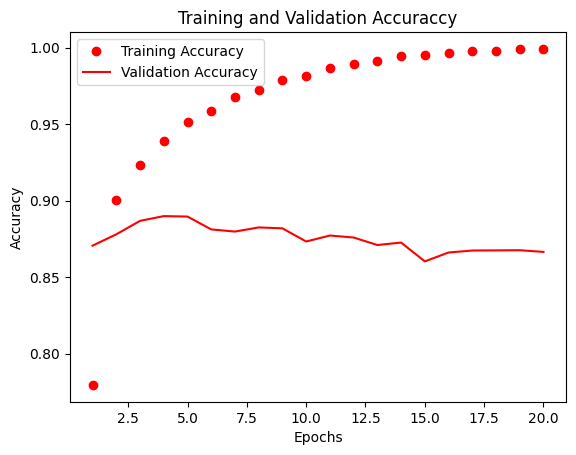

In [19]:
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
#Retraining our model
model.fit(partial_X_train,
                   partial_y_train,
                   epochs=3,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/3
27/30 [==========================>...] - ETA: 0s - loss: 0.0052 - binary_accuracy: 0.9998

2023-02-26 20:37:08.054561: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 1s 20ms/step - loss: 0.0055 - binary_accuracy: 0.9998 - val_loss: 0.7254 - val_binary_accuracy: 0.8636
Epoch 2/3
13/30 [============>.................] - ETA: 0s - loss: 0.0041 - binary_accuracy: 0.9998

2023-02-26 20:37:08.687913: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - binary_accuracy: 0.9999 - val_loss: 0.7533 - val_binary_accuracy: 0.8646
Epoch 3/3
30/30 [==============================] - 0s 6ms/step - loss: 0.0045 - binary_accuracy: 0.9996 - val_loss: 0.7905 - val_binary_accuracy: 0.8647


In [21]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

103/782 [==>...........................] - ETA: 0s 

2023-02-26 20:37:16.429174: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 0s 454us/step


In [22]:
result

array([[0.00270385],
       [0.99999994],
       [0.9986681 ],
       ...,
       [0.00038296],
       [0.00561481],
       [0.37385985]], dtype=float32)

In [23]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

In [25]:
# Error
mae
     

0.15192